In [21]:
#!/usr/bin/env python3  
from keras.datasets import mnist  
from keras.utils import np_utils  
import numpy as np  
np.random.seed(10)  
  
# Read MNIST data  
(X_Train, y_Train), (X_Test, y_Test) = mnist.load_data()  
  
# Translation of data  
X_Train40 = X_Train.reshape(X_Train.shape[0], 1, 28, 28).astype('float32')  
X_Test40 = X_Test.reshape(X_Test.shape[0], 1, 28, 28).astype('float32')  

In [22]:
# Standardize feature data  
X_Train40_norm = X_Train40 / 255  
X_Test40_norm = X_Test40 /255  
  
# Label Onehot-encoding  
y_TrainOneHot = np_utils.to_categorical(y_Train)  
y_TestOneHot = np_utils.to_categorical(y_Test)  

In [4]:
from keras.models import Sequential  
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D  
  
model = Sequential()  
# Create CN layer 1  
model.add(Conv2D(filters=16,  
                 kernel_size=(5,5),  
                 padding='same',  
                 input_shape=(28,28,1),  
                 activation='relu'))  
# Create Max-Pool 1  
model.add(MaxPooling2D(pool_size=(2,2)))  
  
# Create CN layer 2  
model.add(Conv2D(filters=36,  
                 kernel_size=(5,5),  
                 padding='same',  
                 input_shape=(28,28,1),  
                 activation='relu'))  
  
# Create Max-Pool 2  
model.add(MaxPooling2D(pool_size=(2,2)))  
  
# Add Dropout layer  
model.add(Dropout(0.25))

In [5]:
model.add(Flatten())  

model.add(Dense(128, activation='relu'))  
model.add(Dropout(0.5))  

model.add(Dense(10, activation='softmax'))  

model.summary()  
print("")  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

In [7]:
# 定義訓練方式  
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  
  
# 開始訓練  
train_history = model.fit(x=X_Train40_norm,  
                          y=y_TrainOneHot, validation_split=0.2,  
                          epochs=5, batch_size=30, verbose=2)  

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 42s - loss: 0.4902 - acc: 0.8481 - val_loss: 0.0929 - val_acc: 0.9709
Epoch 2/10
 - 38s - loss: 0.1307 - acc: 0.9606 - val_loss: 0.0615 - val_acc: 0.9814
Epoch 3/10
 - 43s - loss: 0.1000 - acc: 0.9706 - val_loss: 0.0495 - val_acc: 0.9842
Epoch 4/10
 - 45s - loss: 0.0771 - acc: 0.9771 - val_loss: 0.0429 - val_acc: 0.9873
Epoch 5/10
 - 41s - loss: 0.0672 - acc: 0.9795 - val_loss: 0.0421 - val_acc: 0.9887
Epoch 6/10
 - 55s - loss: 0.0586 - acc: 0.9827 - val_loss: 0.0362 - val_acc: 0.9895
Epoch 7/10
 - 54s - loss: 0.0536 - acc: 0.9838 - val_loss: 0.0374 - val_acc: 0.9886
Epoch 8/10
 - 44s - loss: 0.0466 - acc: 0.9858 - val_loss: 0.0340 - val_acc: 0.9902
Epoch 9/10
 - 43s - loss: 0.0445 - acc: 0.9868 - val_loss: 0.0334 - val_acc: 0.9915
Epoch 10/10
 - 42s - loss: 0.0415 - acc: 0.9873 - val_loss: 0.0335 - val_acc: 0.9903


In [13]:
%matplotlib inline

import os  
import matplotlib.pyplot as plt  

def isDisplayAvl():  
    return 'DISPLAY' in os.environ.keys()    

def plot_image(image):  
    fig = plt.gcf()  
    fig.set_size_inches(2,2)  
    plt.imshow(image, cmap='binary')  
    plt.show()  

def plot_images_labels_predict(images, labels, prediction, idx, num=10):  
    fig = plt.gcf()  
    fig.set_size_inches(12, 14)  
    if num > 25: num = 25  
    for i in range(0, num):  
        ax=plt.subplot(5,5, 1+i)  
        ax.imshow(images[idx], cmap='binary')  
        title = "l=" + str(labels[idx])  
        if len(prediction) > 0:  
            title = "l={},p={}".format(str(labels[idx]), str(prediction[idx]))  
        else:  
            title = "l={}".format(str(labels[idx]))  
        ax.set_title(title, fontsize=10)  
        ax.set_xticks([]); ax.set_yticks([])  
        idx+=1  
    plt.show()  

def show_train_history(train_history, train, validation):  
    plt.plot(train_history.history[train])  
    plt.plot(train_history.history[validation])  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show()  

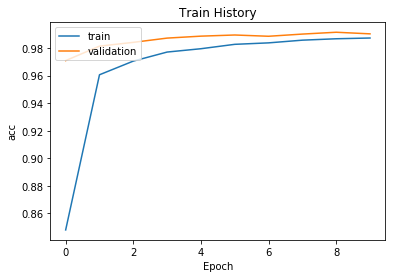

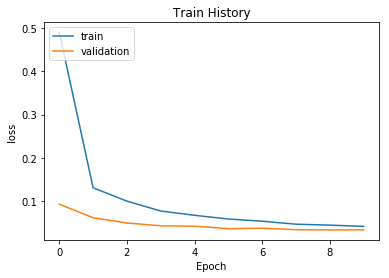

In [15]:
from utils import *  
if isDisplayAvl():  
    show_train_history(train_history, 'acc', 'val_acc')  
    show_train_history(train_history, 'loss', 'val_loss')  

10000/10000 [==============================] - 6s 637us/step

	[Info] Accuracy of testing data = 98.7%
	[Info] Making prediction of X_Test4D_norm

	[Info] Show 10 prediction result (From 240):
[5 9 8 7 2 3 0 2 4 2]



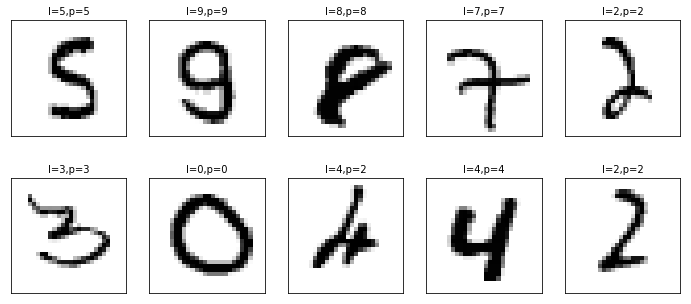

In [18]:
scores = model.evaluate(X_Test40_norm, y_TestOneHot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))  


print("\t[Info] Making prediction of X_Test4D_norm")  
prediction = model.predict_classes(X_Test40_norm)  # Making prediction and save result to prediction  
print()  
print("\t[Info] Show 10 prediction result (From 240):")  
print("%s\n" % (prediction[240:250]))  


if isDisplayAvl():  
    plot_images_labels_predict(X_Test, y_Test, prediction, idx=240)  

In [19]:
import pandas as pd  
print("\t[Info] Display Confusion Matrix:")  
print("%s\n" % pd.crosstab(y_Test, prediction, rownames=['label'], colnames=['predict']))  

	[Info] Display Confusion Matrix:
predict    0     1     2     3    4    5    6    7    8    9
label                                                       
0        971     0     0     0    0    0    6    1    2    0
1          0  1120     2     2    1    0    2    1    7    0
2          0     0  1022     1    0    0    2    1    6    0
3          1     0     0  1006    0    1    0    0    2    0
4          0     1     1     0  964    0    5    0    2    9
5          0     0     0     6    0  883    1    0    2    0
6          2     2     1     0    1    1  949    0    2    0
7          0     4     8     3    1    2    0  993    3   14
8          0     0     0     0    0    0    0    0  973    1
9          2     3     0     1    1    0    0    1   11  990



In [23]:
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential  
  
model = Sequential()  
# model.add(Conv2D(
#     batch_input_shape=(64, 1, 28, 28),  #batch, channels, height, width
#     filters=32,
#     kernel_size=5,
#     strides=1,
#     padding='same',      # Padding method
#     data_format='channels_first',
# ))

model.add(Conv2D(
    filters=32, 
    kernel_size=(5, 5), 
    strides=(1, 1),
    padding='same',      # Padding method
    data_format='channels_first',
    input_shape=(1, 28, 28),
    activation='relu'
))

# model.add(Activation('relu'))

model.add(MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2),
    padding='same',    # Padding method
    data_format='channels_first',
))

model.add(Conv2D(
    64, 
    5, 
    strides=1, 
    padding='same', 
    data_format='channels_first', 
    activation='relu'
))

# model.add(Activation('relu'))
model.add(MaxPooling2D(
    2, 
    2, 
    'same', 
    data_format='channels_first'
))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_Train40_norm, y_TrainOneHot, epochs=1, batch_size=32,)

# model.fit(x=X_Train40_norm,  
#                           y=y_TrainOneHot, validation_split=0.2,  
#                           epochs=10, batch_size=300, verbose=2)  
print() 
print('making prediction')  
scores = model.evaluate(X_Test40_norm, y_TestOneHot)  
 
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))  

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 32, 28, 28)        832       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 32, 14, 14)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 64, 14, 14)        51264     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 64, 7, 7)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 1024)              3212288   
_________________________________________________________________
activation_11 (Activation)   (None, 1024)              0         
__________

In [24]:
def get_model_memory_usage(batch_size, model):
    import numpy as np
    from keras import backend as K

    shapes_mem_count = 0
    for l in model.layers:
        single_layer_mem = 1
        for s in l.output_shape:
            if s is None:
                continue
            single_layer_mem *= s
        shapes_mem_count += single_layer_mem

    trainable_count = np.sum([K.count_params(p) for p in set(model.trainable_weights)])
    non_trainable_count = np.sum([K.count_params(p) for p in set(model.non_trainable_weights)])

    total_memory = 4.0*batch_size*(shapes_mem_count + trainable_count + non_trainable_count)
    gbytes = np.round(total_memory / (1024.0 ** 3), 3)
    return gbytes

get_model_memory_usage(32, model)

0.397

In [76]:
import keras.backend as K

for l in model.layers:
    print(l)
#     if 'conv' in l.name:
#         l_weight = l.get_weights()
#         print(l_weight[1].)
        

In [45]:
# utility functions
from mpl_toolkits.axes_grid1 import make_axes_locatable

def nice_imshow(ax, data, vmin=None, vmax=None, cmap=None):
    """Wrapper around pl.imshow"""
    if cmap is None:
        cmap = cm.jet
    if vmin is None:
        vmin = data.min()
    if vmax is None:
        vmax = data.max()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    im = ax.imshow(data, vmin=vmin, vmax=vmax, interpolation='nearest', cmap=cmap)
    pl.colorbar(im, cax=cax)

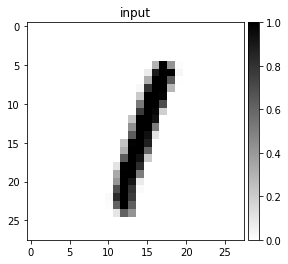

In [55]:
# Visualize the first layer of convolutions on an input image
import pylab as pl
import matplotlib.cm as cm

X = X_Test40_norm[5]

pl.figure()
pl.title('input')
nice_imshow(pl.gca(), np.squeeze(X), vmin=0, vmax=1, cmap=cm.binary)

In [51]:
import numpy.ma as ma
def make_mosaic(imgs, nrows, ncols, border=1):
    """
    Given a set of images with all the same shape, makes a
    mosaic with nrows and ncols
    """
    nimgs = imgs.shape[0]
    imshape = imgs.shape[1:]
    
    mosaic = ma.masked_all((nrows * imshape[0] + (nrows - 1) * border,
                            ncols * imshape[1] + (ncols - 1) * border),
                            dtype=np.float32)
    
    paddedh = imshape[0] + border
    paddedw = imshape[1] + border
    for i in xrange(nimgs):
        row = int(np.floor(i / ncols))
        col = i % ncols
        
        mosaic[row * paddedh:row * paddedh + imshape[0],
               col * paddedw:col * paddedw + imshape[1]] = imgs[i]
    return mosaic

(5, 5, 1, 32) (32,)
W shape :  (32, 5, 5)


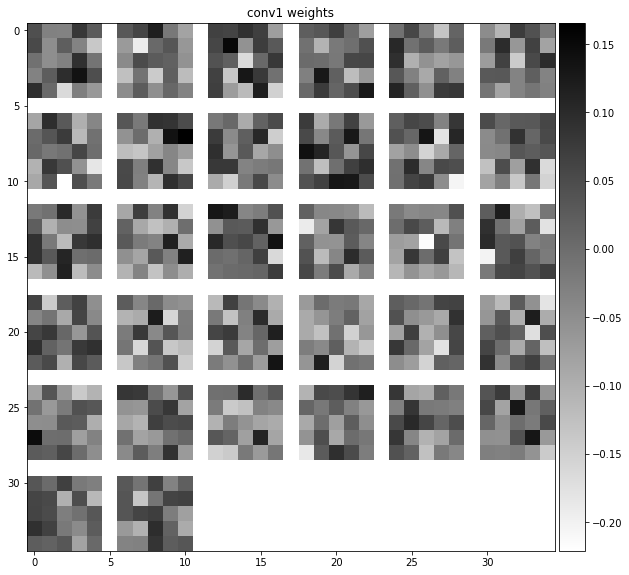

In [79]:
# Visualize weights

W = model.layers[0].get_weights()  #w&b
print(model.layers[0])
print(W[0].shape, W[1].shape)
W = np.squeeze(W[0], axis=2).reshape(32, 5, 5)
xrange=range
print("W shape : ", W.shape)

pl.figure(figsize=(10, 10))
pl.title('conv1 weights')
nice_imshow(pl.gca(), make_mosaic(W, 6, 6), cmap=cm.binary)

(5, 5, 32, 64) (64,)
W shape :  (5, 5, 32, 64)
W shape :  (64, 5, 5)


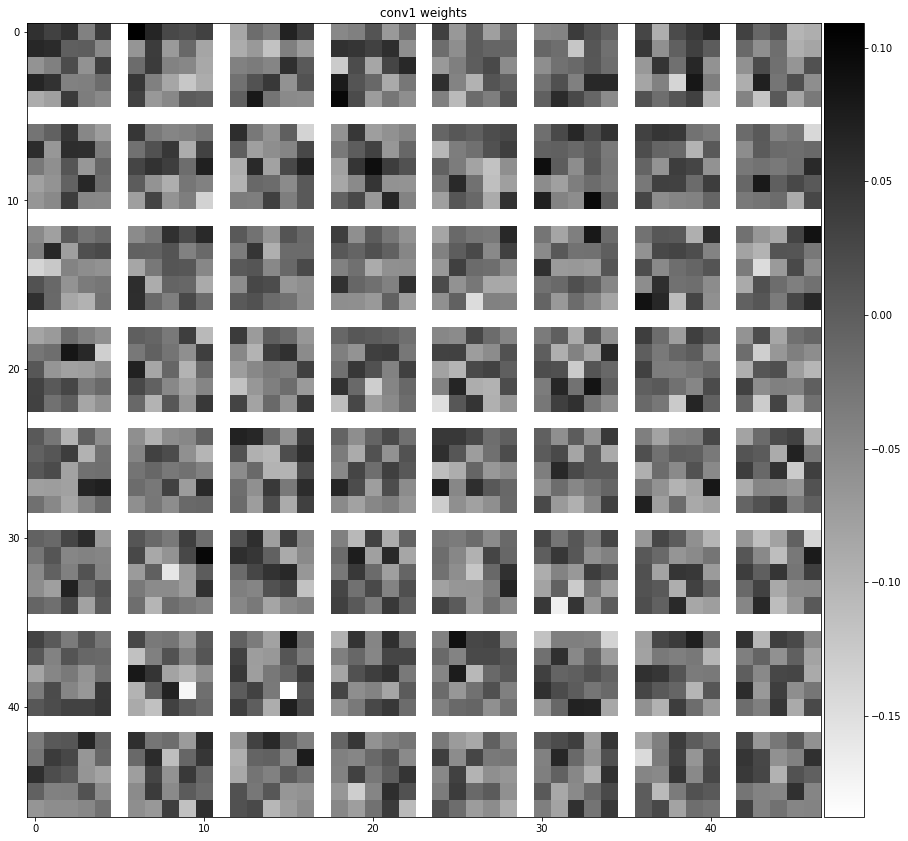

In [88]:
print(model.layers[2])
W = model.layers[2].get_weights()  #w&b
print(W[0].shape, W[1].shape)
# W = np.squeeze(W[0], axis=2)#.reshape(64, 5, 5, 32)
# W[0=np.array(W[0])
print("W shape : ", W[0].shape)
W = W[0][:, :, 0, :].reshape(64, 5, 5)
xrange=range
print("W shape : ", W.shape)

pl.figure(figsize=(15, 15))
pl.title('conv1 weights')
nice_imshow(pl.gca(), make_mosaic(W, 8, 8), cmap=cm.binary)